## `Paragraph text recognizer`

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import sys
sys.path.append(os.path.abspath('../..'))

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

from text_recognizer.models.line_detector_model import LineDetectorModel
from text_recognizer.datasets.iam_paragraphs_dataset import IamParagraphsDataset
from text_recognizer.paragraph_text_recognizer import ParagraphTextRecognizer
import text_recognizer.util as util

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def plot(image):
    plt.figure(figsize=(15, 15))
    plt.imshow(image, cmap='gray', vmin=0, vmax=max(1, image.max()))
    plt.colorbar()

def hplot(x, y, y_pred=None, title=''):
    fig = plt.figure(figsize=(16, 9))
    fig.suptitle(title)
    
    ax1 = fig.add_subplot(131)
    ax1.imshow(x, cmap='gray', vmin=0, vmax=max(1, x.max()))
    
    ax2 = fig.add_subplot(132)
    ax2.imshow(y, cmap='gray', vmin=0, vmax=max(1, y.max()))
    
    if y_pred is not None:
        ax3 = fig.add_subplot(133)
        ax3.imshow(y_pred, cmap='gray', vmin=0, vmax=max(1, y_pred.max()))

In [3]:
K.clear_session()
text_recog = ParagraphTextRecognizer()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None)   0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None, None, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 1 800         lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 1 12560       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              (None, 28, 952)      0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 28, 952, 1)   0           image[0][0]                      
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 189, 28, 12,  0           reshape[0][0]                    
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, 189, 128)     412160      lambda_1[0][0]                   
__________________________________________________________________________________________________
lstm (LSTM

[(98, 910), (76, 905), (87, 881), (65, 886), (76, 934), (87, 944), (82, 944), (76, 968), (71, 930), (82, 997), (87, 217), (54, 213), (65, 276), (27, 38)]


'agt to wo puote sone bf.ing orts a Lage myirity f Lacmr Mr B nre hitaly to trm hium the tot-aifte molkin. To rts Lnc wtl ben that ss Loatomr r t# apond the rement Btl whik buygtt lyf ruw inte enaterae, toy shmd iot rw put ftwmrd mineers. t bakoe het the thme of tard sthutd te nhacted and tht Eatomr shomltd mt tohe any styps whict mumd opear to iouep ypoi" an ont ehhed iEe  thesh BBeck tae'

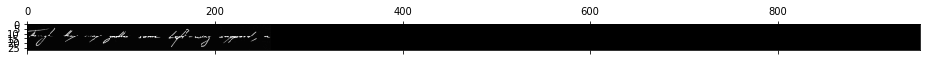

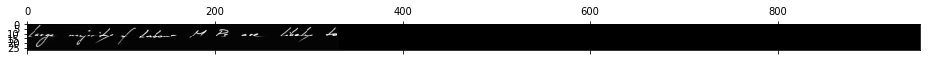

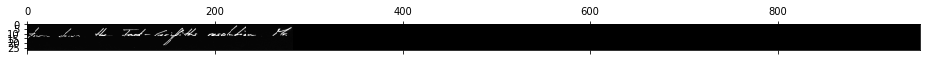

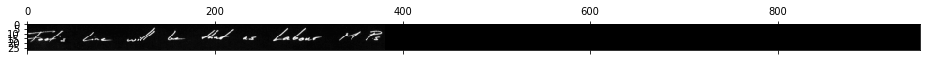

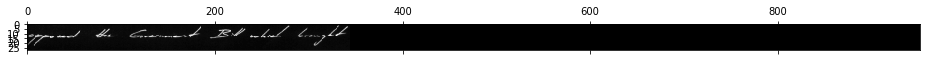

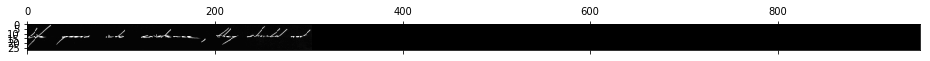

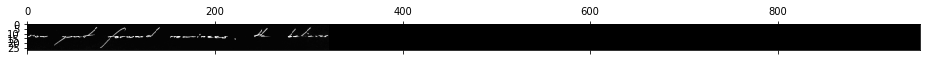

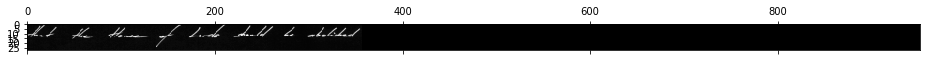

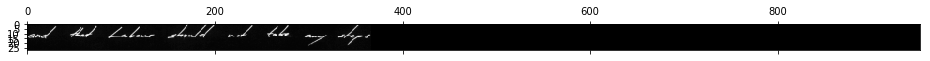

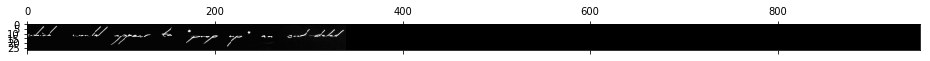

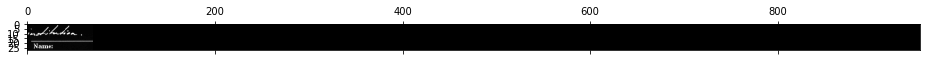

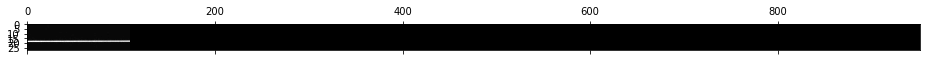

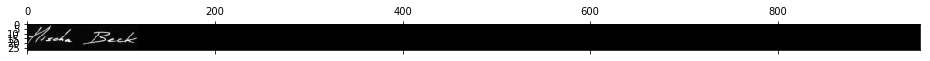

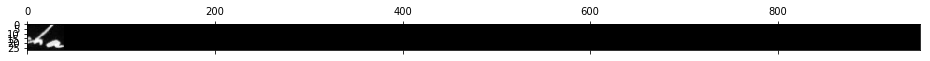

In [4]:
image_basenames = ['a01-000u.jpg', 'a01-000x.jpg', 'a01-003.jpg', 'a01-003u.jpg']

image_or_filename = f'../../data/raw/iam/iamdb/forms/{image_basenames[2]}'
# image_or_filename = '../../data/processed/iam_paragraphs/crops/a01-000u.jpg'

full_image = util.read_image(image_or_filename, grayscale=True)
roi_image = full_image[370:,:]
string, crops = text_recog.predict(roi_image)
for crop in crops:
    plt.matshow(crop, cmap='gray')
string

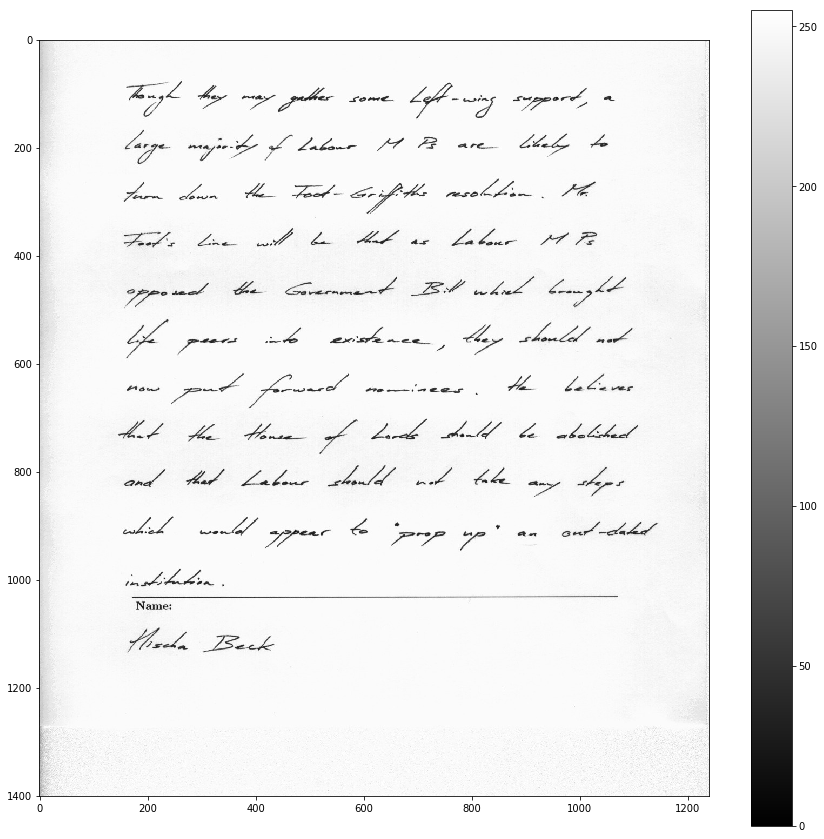

In [5]:
real_image = util.read_image(image_or_filename, grayscale=True)
plot(roi_image)

## View line segmentation

In [6]:
image, scale_down_factor_yx = text_recog._prepare_image_for_line_detector_model(roi_image)
line_segmentation = text_recog.line_detector_model.predict_on_image(image)

In [8]:
roi_image.shape, image.shape, scale_down_factor_yx, line_segmentation.shape

((1401, 1240), (256, 256), [5.47265625, 4.84375], (256, 256, 3))

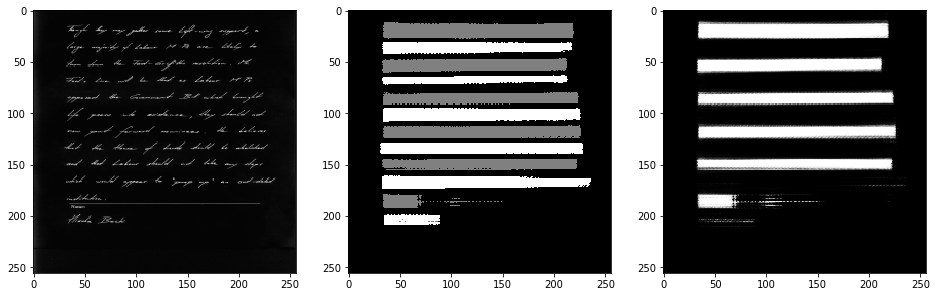

In [10]:
hplot(image, np.argmax(line_segmentation, axis=-1), line_segmentation[:,:,1])

### Channels of line segmentation

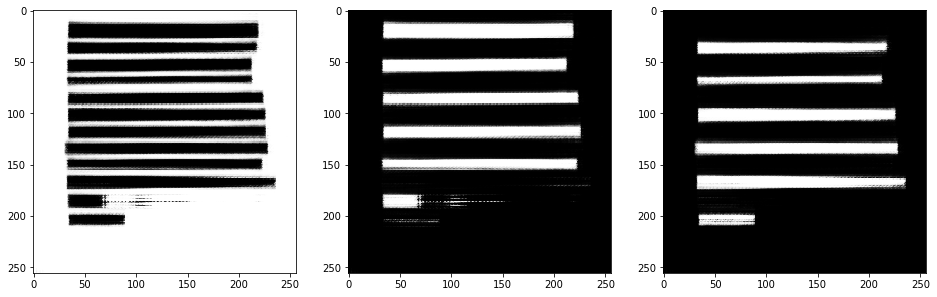

In [11]:
hplot(line_segmentation[:,:,0], line_segmentation[:,:,1], line_segmentation[:,:,2])